In [8]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# untuk test
from keras.preprocessing.image import img_to_array
import cv2
import numpy as np

In [9]:
dataset_path = 'dataset-img'

In [10]:
# Baca file CSV
df = pd.read_csv('data-label/hiragana_labels.csv')

# Konversi DataFrame ke dictionary
hiragana_labels = dict(zip(df.Hiragana, zip(df.Romaji, df.Label)))

In [11]:
print(hiragana_labels)

{'あ': ('a', 0), 'い': ('i', 1), 'う': ('u', 2), 'え': ('e', 3), 'お': ('o', 4), 'か': ('ka', 5), 'き': ('ki', 6), 'く': ('ku', 7), 'け': ('ke', 8), 'こ': ('ko', 9), 'さ': ('sa', 10), 'し': ('shi', 11), 'す': ('su', 12), 'せ': ('se', 13), 'そ': ('so', 14), 'た': ('ta', 15), 'ち': ('chi', 16), 'つ': ('tsu', 17), 'て': ('te', 18), 'と': ('to', 19), 'な': ('na', 20), 'に': ('ni', 21), 'ぬ': ('nu', 22), 'ね': ('ne', 23), 'の': ('no', 24), 'は': ('ha', 25), 'ひ': ('hi', 26), 'ふ': ('fu', 27), 'へ': ('he', 28), 'ほ': ('ho', 29), 'ま': ('ma', 30), 'み': ('mi', 31), 'む': ('mu', 32), 'め': ('me', 33), 'も': ('mo', 34), 'や': ('ya', 35), 'ゆ': ('yu', 36), 'よ': ('yo', 37), 'ら': ('ra', 38), 'り': ('ri', 39), 'る': ('ru', 40), 'れ': ('re', 41), 'ろ': ('ro', 42), 'わ': ('wa', 43), 'を': ('wo', 44), 'ん': ('n', 45)}


In [12]:
# Fungsi untuk mengonversi label ke bentuk numerik
def label_to_numeric(label):
    return hiragana_labels[label]

# Gunakan ImageDataGenerator untuk memuat dan melabeli gambar
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(32, 32),  # sesuaikan dengan ukuran input model
    color_mode='grayscale',  # sesuaikan dengan warna gambar
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 768 images belonging to 56 classes.
Found 192 images belonging to 56 classes.


Label: れ, Romaji: re
Label: None, Romaji: None
Label: け, Romaji: ke
Label: ね, Romaji: ne
Label: は, Romaji: ha
Label: つ, Romaji: tsu
Label: は, Romaji: ha
Label: う, Romaji: u
Label: None, Romaji: None


C:\Users\blptn\AppData\Local\Temp\ipykernel_7932\1042434735.py:18: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  plt.tight_layout()
C:\Users\blptn\AppData\Local\Temp\ipykernel_7932\1042434735.py:18: UserWarning: Glyph 12369 (\N{HIRAGANA LETTER KE}) missing from current font.
  plt.tight_layout()
C:\Users\blptn\AppData\Local\Temp\ipykernel_7932\1042434735.py:18: UserWarning: Glyph 12397 (\N{HIRAGANA LETTER NE}) missing from current font.
  plt.tight_layout()
C:\Users\blptn\AppData\Local\Temp\ipykernel_7932\1042434735.py:18: UserWarning: Glyph 12399 (\N{HIRAGANA LETTER HA}) missing from current font.
  plt.tight_layout()
C:\Users\blptn\AppData\Local\Temp\ipykernel_7932\1042434735.py:18: UserWarning: Glyph 12388 (\N{HIRAGANA LETTER TU}) missing from current font.
  plt.tight_layout()
C:\Users\blptn\AppData\Local\Temp\ipykernel_7932\1042434735.py:18: UserWarning: Glyph 12358 (\N{HIRAGANA LETTER U}) missing from current font.
  plt.tight_layout()
C:\Users\bl

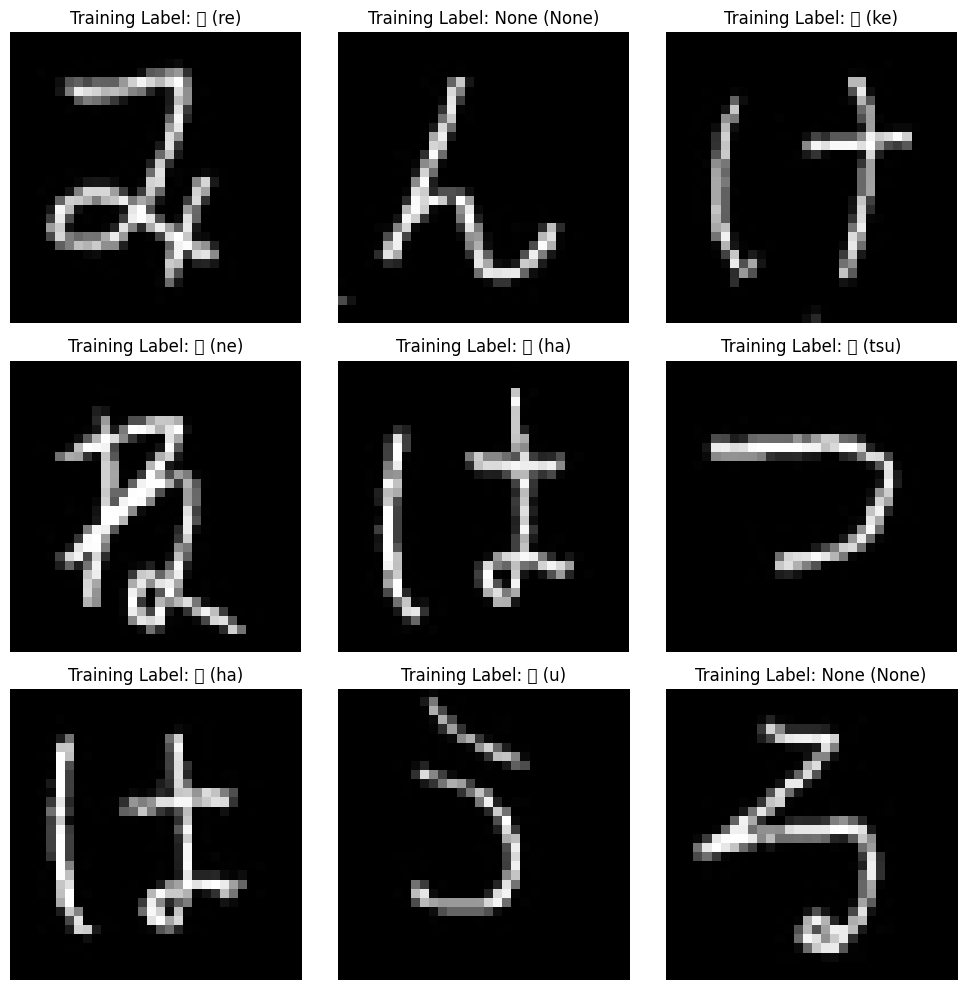

In [20]:
# Fungsi untuk mengonversi label one-hot encoded ke label sesuai dengan kamus hiragana_labels
def one_hot_to_label(one_hot_label):
    for label, (romaji, class_id) in hiragana_labels.items():
        if one_hot_label[class_id] == 1:
            return label, romaji
    return None, None  # Return None jika label tidak ditemukan

# Tampilkan beberapa contoh gambar dari dataset pelatihan
train_sample_images, train_sample_labels = next(train_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_sample_images[i].reshape(32, 32), cmap='gray')
    label, romaji = one_hot_to_label(train_sample_labels[i])
    print(f"Label: {label}, Romaji: {romaji}")  # Tampilkan label dan romaji
    plt.title(f'Training Label: {label} ({romaji})')
    plt.axis('off')
plt.tight_layout()
plt.show()


In [14]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(120, activation='relu'),
    Dense(84, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')  # Sesuaikan dengan jumlah kelas
])

In [15]:
# tambahan model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Latih model
model.fit(
    train_generator,
    epochs=10,  # Sesuaikan dengan kebutuhan
    validation_data=validation_generator
)

Epoch 1/10
24/24 [==============================] - 3s 64ms/step - loss: 3.8633 - accuracy: 0.0573 - val_loss: 3.4390 - val_accuracy: 0.0885
Epoch 2/10
24/24 [==============================] - 1s 37ms/step - loss: 2.4901 - accuracy: 0.3294 - val_loss: 1.3204 - val_accuracy: 0.6146
Epoch 3/10
24/24 [==============================] - 1s 40ms/step - loss: 0.8984 - accuracy: 0.7292 - val_loss: 0.6949 - val_accuracy: 0.7917
Epoch 4/10
24/24 [==============================] - 1s 48ms/step - loss: 0.5331 - accuracy: 0.8451 - val_loss: 0.5085 - val_accuracy: 0.8906
Epoch 5/10
24/24 [==============================] - 1s 35ms/step - loss: 0.2555 - accuracy: 0.9154 - val_loss: 0.4085 - val_accuracy: 0.8750
Epoch 6/10
24/24 [==============================] - 1s 37ms/step - loss: 0.1317 - accuracy: 0.9688 - val_loss: 0.4670 - val_accuracy: 0.8542
Epoch 7/10
24/24 [==============================] - 1s 36ms/step - loss: 0.0647 - accuracy: 0.9831 - val_loss: 0.3041 - val_accuracy: 0.9062
Epoch 8/10
24

In [16]:
# Evaluasi model
test_loss, test_acc = model.evaluate(validation_generator)
print(f'Akurasi pada data validasi: {test_acc * 100:.2f}%')

6/6 [==============================] - 0s 22ms/step - loss: 0.3685 - accuracy: 0.8750
Akurasi pada data validasi: 87.50%


In [17]:
from keras.models import load_model

# Definisikan path lengkap untuk penyimpanan model
model_path = 'model/model.h5'  # Ganti dengan path lengkap Anda

# Simpan model ke file model.h5
model.save(model_path)

c:\Users\blptn\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
def predict_image_cv(model, image, label_map):
    # Ubah gambar menjadi skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize gambar ke ukuran yang diharapkan oleh model
    resized_img = cv2.resize(gray, (32, 32))
    # Normalisasi nilai pixel
    resized_img = resized_img / 255.0
    # Ubah gambar menjadi array numpy dan tambahkan dimensi batch
    img_array = np.expand_dims(img_to_array(resized_img), axis=0)
    img_array = np.expand_dims(img_array, axis=-1)

    # Melakukan prediksi menggunakan model
    predictions = model.predict(img_array)

    # Mendapatkan kelas prediksi
    predicted_class = np.argmax(predictions[0])

    # Mendapatkan label dari kelas prediksi
    for label, (romaji, class_id) in label_map.items():
        if class_id == predicted_class:
            predicted_label = label
            predicted_romaji = romaji
            break

    return predicted_label, predicted_romaji

In [19]:
def predict_image_cv(model, image, label_map):
    # Ubah gambar menjadi skala abu-abu
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize gambar ke ukuran yang diharapkan oleh model
    resized_img = cv2.resize(gray, (32, 32))
    # Normalisasi nilai pixel
    resized_img = resized_img / 255.0
    # Ubah gambar menjadi array numpy dan tambahkan dimensi batch
    img_array = np.expand_dims(img_to_array(resized_img), axis=0)
    img_array = np.expand_dims(img_array, axis=-1)

    # Melakukan prediksi menggunakan model
    predictions = model.predict(img_array)

    # Mendapatkan kelas prediksi
    predicted_class = np.argmax(predictions[0])

    # Mendapatkan label dari kelas prediksi
    predicted_label = None
    predicted_romaji = None
    for label, (romaji, class_id) in label_map.items():
        if class_id == predicted_class:
            predicted_label = label
            predicted_romaji = romaji
            break

    return predicted_label, predicted_romaji

# Inisialisasi kamera
cap = cv2.VideoCapture(0)

# Loop untuk mendapatkan frame dari kamera
while True:
    # Baca frame dari kamera
    ret, frame = cap.read()
    if not ret:
        print("Gagal membaca frame dari kamera.")
        break

    # Lakukan prediksi pada frame yang didapat
    predicted_label, predicted_romaji = predict_image_cv(model, frame, hiragana_labels)

    # Tampilkan hasil prediksi pada layar
    if predicted_label is not None and predicted_romaji is not None:
        cv2.putText(frame, f'Prediksi: {predicted_label} ({predicted_romaji})', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.imshow('Frame', frame)

    # Keluar dari loop jika tombol 'q' ditekan
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Tutup kamera dan jendela OpenCV
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 18ms/step
